## Homework 7

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Classification

In [57]:
# Analyze classification.csv
classification = pd.read_csv("classification.csv")
classification

,x1,x2,label
0,-10.097950,-3.230260,1
1,-2.255579,5.107107,0
2,-10.562037,-3.919005,1
3,-0.126070,3.079037,0
4,-9.249422,-4.100176,1
...,...,...,...
495,-10.392365,-3.890568,1
496,-9.143800,-4.747003,1
497,-10.010185,-4.373446,1
498,-2.262481,4.878788,0


In [4]:
from sklearn import neighbors

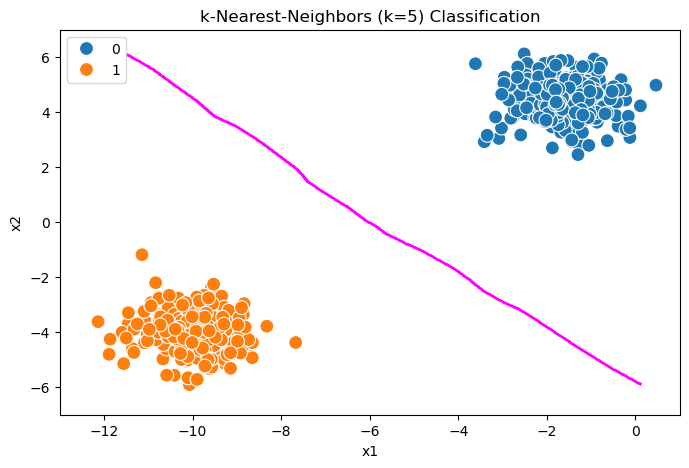

In [64]:
# preparte features for classification
X, y = np.c_[classification['x1'], classification['x2']], classification['label']
X.shape

# k-Nearest-Neighbors
n_neighbors = 5
weights = ['uniform', 'distance']
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights[1])
kNN.fit(X, y)

xx, yy = np.meshgrid(np.arange(np.min(classification["x1"]), np.max(classification["x1"]), 0.02),
                     np.arange(np.min(classification["x2"]), np.max(classification["x2"]), 0.02))
Z = kNN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,5))
sns.scatterplot(data=classification, x='x1', y='x2', hue='label', s=100)
plt.contour(xx, yy, Z, levels=[0.5], colors='magenta', linewidths=2)  # Seperation line for classification
plt.title("k-Nearest-Neighbors (k=5) Classification")
plt.xlim([-13, 1])
plt.ylim([-7, 7])
plt.legend()
plt.savefig("Plots/classification.png")
plt.show()


### Regression 1

In [6]:
# Analyze regression_1.csv
reg1 = pd.read_csv("regression_1.csv")
reg1.head()

,x1,x2
0,0.0,-0.674904
1,0.1,-0.479806
2,0.2,-0.806082
3,0.3,0.053077
4,0.4,-0.393342


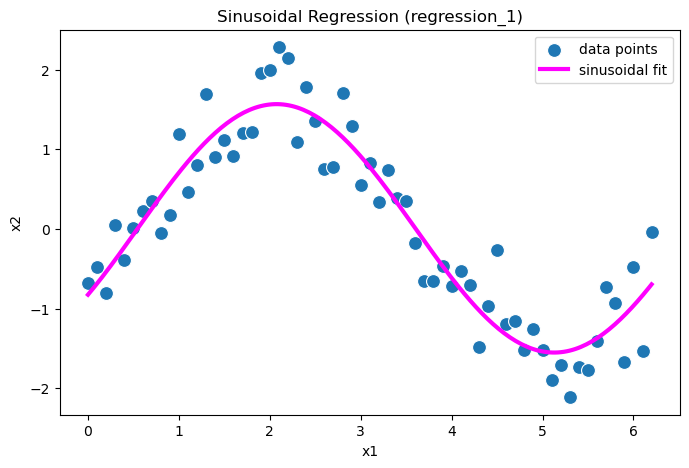

Optimized parameters: A=1.559, B=1.029, C=-0.564, D=0.007


In [ ]:
from scipy.optimize import curve_fit

# Define sinusoidal function
def sinusoidal_model(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# Prepare data
X = np.asarray(reg1['x1'])
y = np.asarray(reg1['x2'])

# Fit parameters with Curve-Fit 
params, _ = curve_fit(sinusoidal_model, X, y, p0=[1, 1, 0, 0])  # Start values: [amplitude, frequency, phase, offset]

# Predictions with fitted model
x_pred = np.linspace(min(X), max(X), 200)
y_pred = sinusoidal_model(x_pred, *params)

# Plot data
plt.figure(figsize=(8, 5))
sns.scatterplot(x=reg1['x1'], y=reg1['x2'], s=100, label='data points')
plt.plot(x_pred, y_pred, color='magenta', linestyle='-', linewidth=3, label='sinusoidal fit')
plt.title("Sinusoidal Regression (regression_1)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.savefig("Plots/Regression_1.png")
plt.show()

# Print fitted parameters
print(f"Optimized parameters: A={params[0]:.3f}, B={params[1]:.3f}, C={params[2]:.3f}, D={params[3]:.3f}")


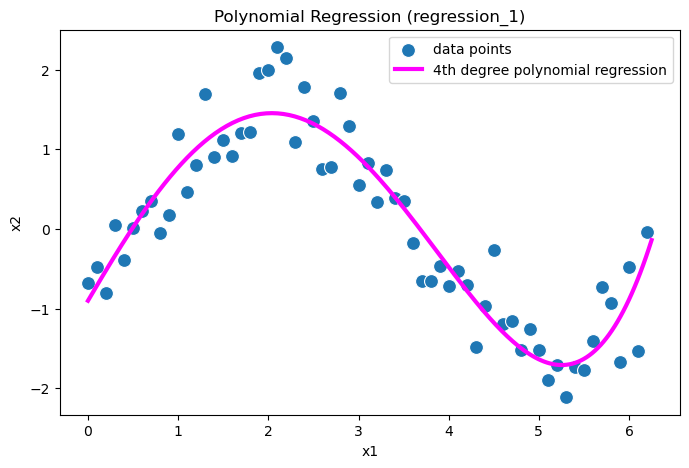

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Prepare data
X = np.asarray(reg1['x1']).reshape(-1, 1)
y = np.asarray(reg1['x2'])

# Polynomial features (4th degree)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Linear regression of polynomial model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions of the model
x_pred = np.linspace(0, 6.25, 200).reshape(-1, 1)
x_pred_poly = poly.transform(x_pred)
y_pred = model.predict(x_pred_poly)

# Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=reg1['x1'], y=reg1['x2'], s=100, label='data points')
plt.plot(x_pred, y_pred, color='magenta', linestyle='-', linewidth=3, label='4th degree polynomial regression')
plt.title("Polynomial Regression (regression_1)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
#plt.savefig("Plots/Regression_1.png")
plt.show()

### Regression 2

In [8]:
# Analyze regression_2.csv
reg2 = pd.read_csv("regression_2.csv")
reg2.head()

,x1,x2
0,-10.0,0.070295
1,-9.0,-0.045762
2,-8.0,0.044281
3,-7.0,-0.012570
4,-6.0,0.208319


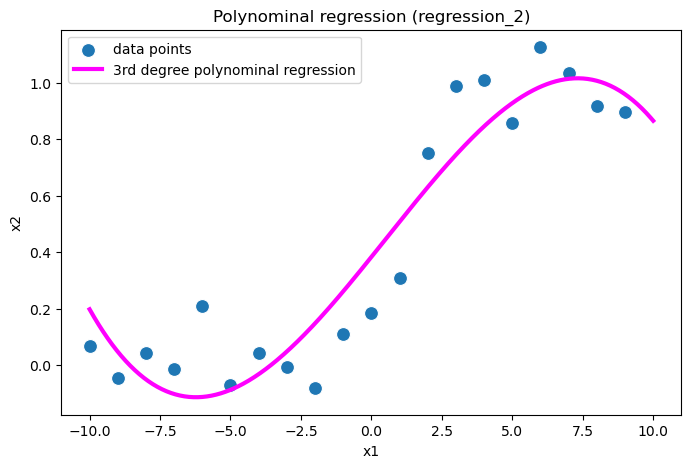

In [75]:
# Prepare data
X = np.asarray(reg2['x1']).reshape(-1, 1)
y = np.asarray(reg2['x2'])

# Polynomial features (3rd degree)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Linear regression of polynomial model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions of the model
x_pred = np.linspace(-10, 10, 500).reshape(-1, 1)
x_pred_poly = poly.transform(x_pred)
y_pred = model.predict(x_pred_poly)

# Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=reg2['x1'], y=reg2['x2'], s=100, label='data points')
plt.plot(x_pred, y_pred, color='magenta', linestyle='-', linewidth=3, label='3rd degree polynominal regression')
plt.title("Polynominal regression (regression_2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.savefig("Plots/Regression_2.png")
plt.show()
